**2.4 PHÂN LOẠI VỚI KNN**

In [1]:
# Import

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Tải X và y từ các file CSV

X = pd.read_csv('D:/HUS_22001541/MachineLearning/Project/data/X_data.csv')
y = pd.read_csv('D:/HUS_22001541/MachineLearning/Project/data/y_data.csv').values.ravel() 

Thực hiện trên dữ liệu gốc

In [3]:
# Chia dữ liệu

X = X.to_numpy()

X_train_origin_41, X_test_origin_41, y_train_origin_41, y_test_origin_41 = train_test_split(X, y, test_size=0.2) #4:1
X_train_origin_73, X_test_origin_73, y_train_origin_73, y_test_origin_73 = train_test_split(X, y, test_size=0.3) #7:3
X_train_origin_64, X_test_origin_64, y_train_origin_64, y_test_origin_64 = train_test_split(X, y, test_size=0.4) #6:4

In [4]:
# Chuẩn hóa dữ liệu

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_origin_41 = scaler.fit_transform(X_train_origin_41)
X_test_origin_41 = scaler.transform(X_test_origin_41)

X_train_origin_73 = scaler.fit_transform(X_train_origin_73)
X_test_origin_73 = scaler.transform(X_test_origin_73)

X_train_origin_64 = scaler.fit_transform(X_train_origin_64)
X_test_origin_64 = scaler.transform(X_test_origin_64)

[0.4021713555846862, 0.4021713555846862, 0.3931621346061197, 0.3813182750159659, 0.3704144398507613, 0.3623575678128466]


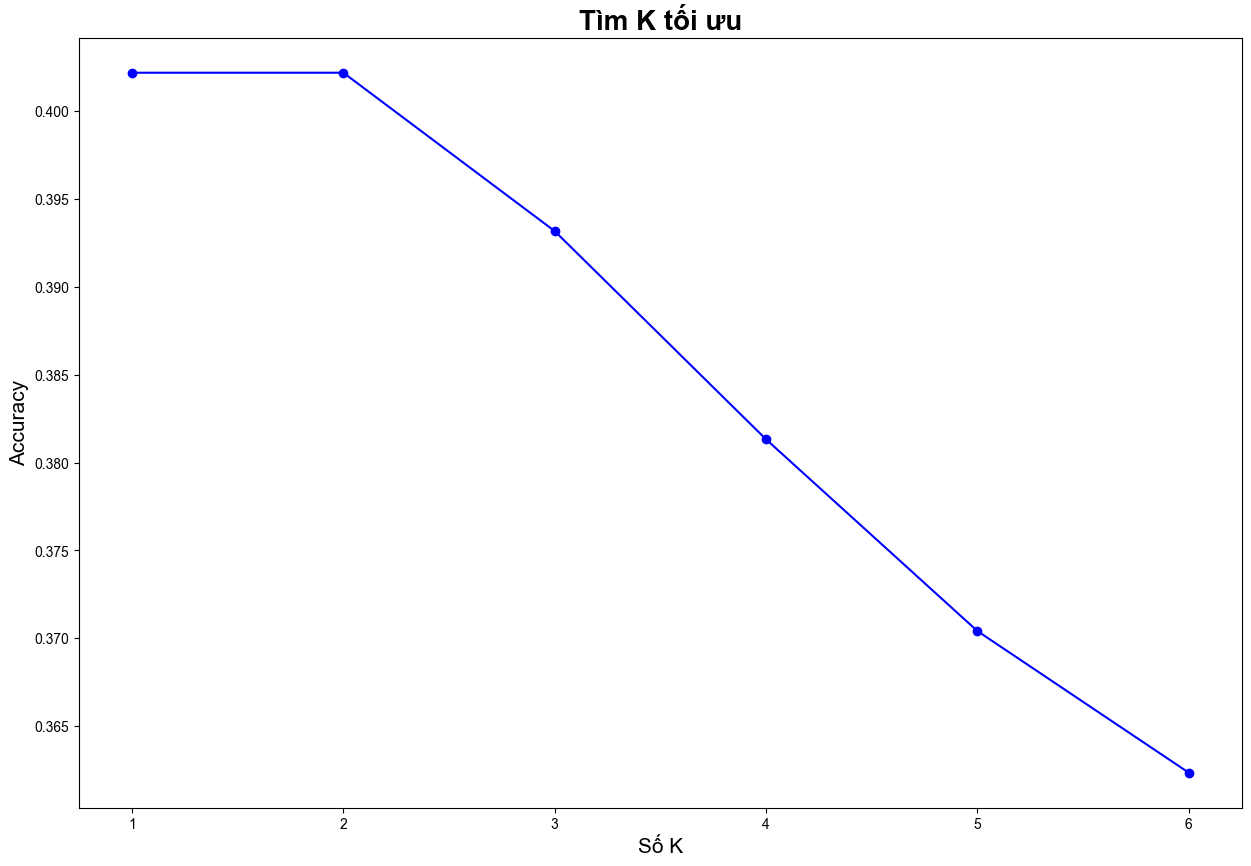

In [5]:
# Sử dụng phương pháp K-fold Cross-Validation để tìm ra K tối ưu

from KNN import KNN
from sklearn.model_selection import KFold

k_values = range(1, 7) 
kf = KFold(n_splits=5)  
mean_accuracies = []

for k in k_values:
    accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        my_clf = KNN(k=k)
        my_clf.fit(X_train, y_train)
        y_pred = my_clf.predict(X_test)

        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

    mean_accuracies.append(np.mean(accuracies))

best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print(mean_accuracies)

plt.figure(figsize=(15, 10))
plt.title('Tìm K tối ưu', fontsize=20, fontweight='bold')
plt.xlabel('Số K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b')

In [6]:
# Dùng model để test thử :)))

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train_origin_41, y_train_origin_41)
y_pred_origin_41_model = classifier.predict(X_test_origin_41)

classifier.fit(X_train_origin_73, y_train_origin_73)
y_pred_origin_73_model = classifier.predict(X_test_origin_73)

classifier.fit(X_train_origin_64, y_train_origin_64)
y_pred_origin_64_model = classifier.predict(X_test_origin_64)   

In [7]:
print("4:1")
print(y_test_origin_41[40:50])
print(y_pred_origin_41_model[40:50])

print("\n7:3")
print(y_test_origin_73[40:50])
print(y_pred_origin_73_model[40:50])

print("\n6:4")
print(y_test_origin_64[40:50])
print(y_pred_origin_64_model[40:50])

4:1
[6 4 1 4 4 3 0 0 3 1]
[6 4 1 4 4 3 0 1 3 1]

7:3
[3 0 5 6 2 5 2 5 6 1]
[3 0 5 2 2 0 2 5 2 0]

6:4
[1 0 0 6 3 0 6 0 6 3]
[0 0 0 6 3 5 5 0 6 3]


In [8]:
# Dùng phương pháp KNN để phân loại trên 3 tập dữ liệu gốc đã được chia với tỷ lệ khác nhau

my_clf = KNN(k = 2)

my_clf.fit(X_train_origin_41, y_train_origin_41)
y_pred_origin_41 = my_clf.predict(X_test_origin_41)
print(f"4:1: \n{y_pred_origin_41[40:50]}")

my_clf.fit(X_train_origin_73, y_train_origin_73)
y_pred_origin_73 = my_clf.predict(X_test_origin_73)
print(f"7:3: \n{y_pred_origin_73[40:50]}")

my_clf.fit(X_train_origin_64, y_train_origin_64)
y_pred_origin_64 = my_clf.predict(X_test_origin_64)
print(f"6:4: \n{y_pred_origin_64[40:50]}")


4:1: 
[6, 4, 1, 4, 4, 3, 0, 1, 3, 6]
7:3: 
[3, 0, 5, 2, 2, 0, 2, 5, 6, 0]
6:4: 
[1, 0, 0, 5, 3, 5, 6, 0, 6, 3]


In [9]:
# Thực hiện kiểm tra Accuracy

acc_41 = np.sum(y_pred_origin_41 == y_test_origin_41) / len(y_test_origin_41)
acc_73 = np.sum(y_pred_origin_73 == y_test_origin_73) / len(y_test_origin_73)
acc_64 = np.sum(y_pred_origin_64 == y_test_origin_64) / len(y_test_origin_64)

print(f"acc_41: {acc_41}")
print(f"acc_73: {acc_73}")
print(f"acc_64: {acc_64}")

acc_41: 0.817966903073286
acc_73: 0.8454258675078864
acc_64: 0.7988165680473372


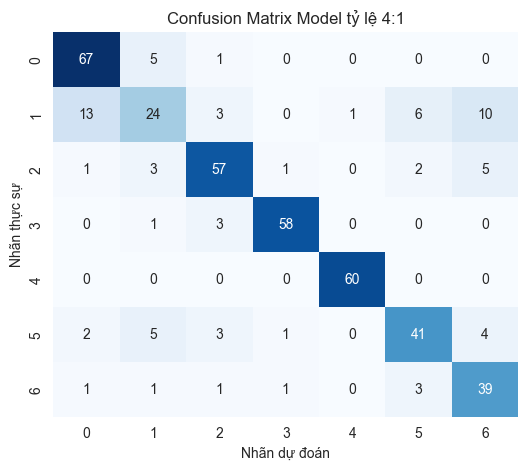

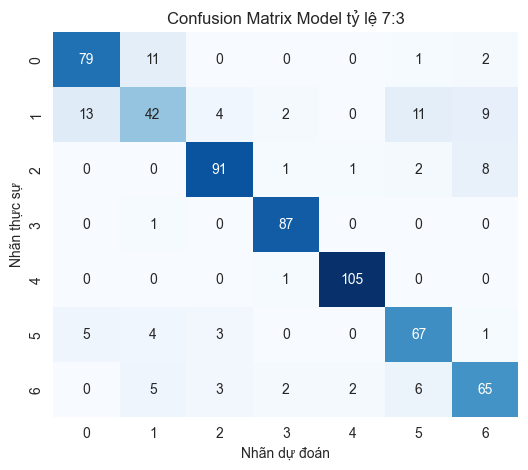

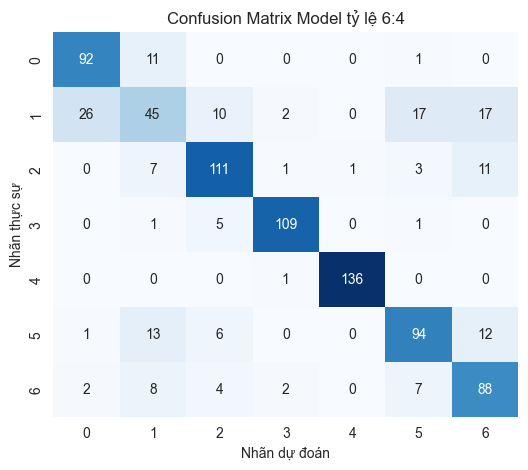

In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm_41 = confusion_matrix(y_test_origin_41, y_pred_origin_41)
cm_73 = confusion_matrix(y_test_origin_73, y_pred_origin_73)
cm_64 = confusion_matrix(y_test_origin_64, y_pred_origin_64)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực sự')
    plt.show()

plot_confusion_matrix(cm_41, "Confusion Matrix Model tỷ lệ 4:1")
plot_confusion_matrix(cm_73, "Confusion Matrix Model tỷ lệ 7:3")
plot_confusion_matrix(cm_64, "Confusion Matrix Model tỷ lệ 6:4")


In [11]:
X_train_origin_41.shape

(1688, 23)

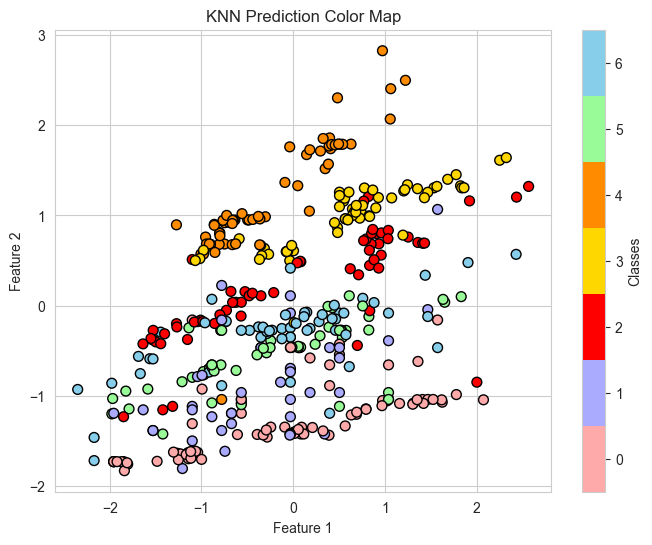

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Giả lập dữ liệu X_test và nhãn dự đoán
X_test = X_test_origin_41  # Thay bằng dữ liệu thực tế
y_pred = y_pred_origin_41  # Nhãn dự đoán từ my_clf.predict()

# Tạo Listed Colormap
colors = ['#FFAAAA', '#AAAAFF', '#FF0000', '#FFD700', '#FF8C00', '#98FB98', '#87CEEB']
cmap = ListedColormap(colors[:len(np.unique(y_pred))])  # Số màu bằng số lớp

# Vẽ color map
plt.figure(figsize=(8, 6))

# Vẽ scatter plot của dữ liệu thử nghiệm và gán nhãn dự đoán
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_pred, cmap=cmap, edgecolor='k', s=50)

# Thêm tiêu đề và các nhãn trục
plt.title("KNN Prediction Color Map")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Hiển thị colorbar để giải thích các lớp
plt.colorbar(ticks=range(len(np.unique(y_pred))), label='Classes')
plt.clim(-0.5, len(np.unique(y_pred)) - 0.5)  # Định dạng colorbar

plt.show()


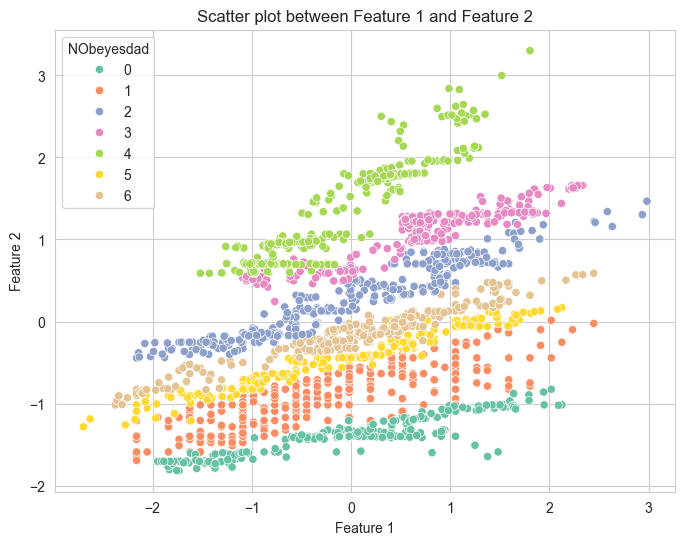

In [31]:
# Chuẩn hóa dữ liệu X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Chuẩn hóa tất cả các cột trong X

# Chuyển X_scaled thành DataFrame và gán lại tên cột từ X.columns
X_scaled_df = pd.DataFrame(X_scaled, columns=[f"Feature_{i}" for i in range(X.shape[1])])

# Ghép nhãn y vào DataFrame X
X_scaled_df['NObeyesdad'] = y

# Chọn cột 1 và 2 của X (tính từ 0, nên là cột có chỉ mục 1 và 2)
X_subset = X_scaled_df[['Feature_1', 'Feature_2']]

# Vẽ scatter plot cho feature 1 và feature 2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_subset, x='Feature_1', y='Feature_2', hue=X_scaled_df['NObeyesdad'], palette='Set2')
plt.title('Scatter plot between Feature 1 and Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [13]:
from sklearn.metrics import classification_report

print("Bảng đánh giá hiệu suất mô hình phân loại tỷ lệ 4:1")
print(classification_report(y_test_origin_41, y_pred_origin_41))

print("Bảng đánh giá hiệu suất mô hình phân loại tỷ lệ 7:3")
print(classification_report(y_test_origin_73, y_pred_origin_73))

print("Bảng đánh giá hiệu suất mô hình phân loại tỷ lệ 6:4")
print(classification_report(y_test_origin_64, y_pred_origin_64))

Bảng đánh giá hiệu suất mô hình phân loại tỷ lệ 4:1
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        73
           1       0.62      0.42      0.50        57
           2       0.84      0.83      0.83        69
           3       0.95      0.94      0.94        62
           4       0.98      1.00      0.99        60
           5       0.79      0.73      0.76        56
           6       0.67      0.85      0.75        46

    accuracy                           0.82       423
   macro avg       0.81      0.81      0.80       423
weighted avg       0.81      0.82      0.81       423

Bảng đánh giá hiệu suất mô hình phân loại tỷ lệ 7:3
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        93
           1       0.67      0.52      0.58        81
           2       0.90      0.88      0.89       103
           3       0.94      0.99      0.96        88
           4       0.97     

Thực hiện trên dữ liệu đã giảm chiều

In [14]:
# Giảm chiều dữ liệu
# Cần tìm hiểu cách PCA hoạt động như nào

from sklearn.decomposition import PCA

pca = PCA(n_components=16) 

X_train_pca_41 = pca.fit_transform(X_train_origin_41)
X_test_pca_41 = pca.transform(X_test_origin_41)

X_train_pca_73 = pca.fit_transform(X_train_origin_73)
X_test_pca_73 = pca.transform(X_test_origin_73)

X_train_pca_64 = pca.fit_transform(X_train_origin_64)
X_test_pca_64 = pca.transform(X_test_origin_64)

In [15]:
my_clf.fit(X_train_pca_41, y_train_origin_41)
y_pred_pca_41 = my_clf.predict(X_test_pca_41)
print(f"4:1: \n{y_pred_pca_41[40:50]}")

my_clf.fit(X_train_pca_73, y_train_origin_73)
y_pred_pca_73 = my_clf.predict(X_test_pca_73)
print(f"7:3: \n{y_pred_pca_73[40:50]}")

my_clf.fit(X_train_pca_64, y_train_origin_64)
y_pred_pca_64 = my_clf.predict(X_test_pca_64)
print(f"6:4: \n{y_pred_pca_64[40:50]}")

4:1: 
[6, 4, 1, 4, 4, 3, 0, 1, 3, 6]
7:3: 
[3, 0, 5, 2, 2, 0, 2, 5, 6, 0]
6:4: 
[0, 0, 0, 5, 3, 5, 5, 0, 6, 3]


In [16]:
# Thực hiện kiểm tra Accuracy

acc_pca_41 = np.sum(y_pred_pca_41 == y_test_origin_41) / len(y_test_origin_41)
acc_pca_73 = np.sum(y_pred_pca_73 == y_test_origin_73) / len(y_test_origin_73)
acc_pca_64 = np.sum(y_pred_pca_64 == y_test_origin_64) / len(y_test_origin_64)

print(f"acc_41: {acc_pca_41}")
print(f"acc_73: {acc_pca_73}")
print(f"acc_64: {acc_pca_64}")

acc_41: 0.7919621749408984
acc_73: 0.831230283911672
acc_64: 0.7857988165680473


In [17]:
print("Bảng đánh giá hiệu suất mô hình phân loại với dữ liệu giảm chiều tỷ lệ 4:1")
print(classification_report(y_test_origin_41, y_pred_pca_41))

print("Bảng đánh giá hiệu suất mô hình phân loại với dữ liệu giảm chiều tỷ lệ 7:3")
print(classification_report(y_test_origin_73, y_pred_pca_73))

print("Bảng đánh giá hiệu suất mô hình phân loại với dữ liệu giảm chiều tỷ lệ 6:4")
print(classification_report(y_test_origin_64, y_pred_pca_64))

Bảng đánh giá hiệu suất mô hình phân loại với dữ liệu giảm chiều tỷ lệ 4:1
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        73
           1       0.63      0.42      0.51        57
           2       0.77      0.80      0.79        69
           3       0.92      0.92      0.92        62
           4       0.98      1.00      0.99        60
           5       0.76      0.68      0.72        56
           6       0.64      0.80      0.71        46

    accuracy                           0.79       423
   macro avg       0.78      0.79      0.78       423
weighted avg       0.79      0.79      0.79       423

Bảng đánh giá hiệu suất mô hình phân loại với dữ liệu giảm chiều tỷ lệ 7:3
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        93
           1       0.60      0.48      0.53        81
           2       0.87      0.87      0.87       103
           3       0.90      0.99   

Trực quan hóa

In [18]:
# Trực quan hóa và đánh giá với thực tế